##### Name: Stuti Upadhyay
##### Campus ID: XT81177
##### Instructor: Chalachew Jemberie 

# **Regressions via `sklearn` and `statsmodels`**

## **0.** Settings

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression, LogisticRegression, PoissonRegressor
from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics         import mean_squared_error, r2_score
from numpy.random            import uniform, normal, poisson, binomial

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels

%matplotlib inline

## **1.** Linear regression

In the case of linear regression $Y$ is a real number and it is modeled as:

$\qquad
\begin{cases}
        \;Y\sim N(\mu,\sigma^2)\\
        \;\mu = \beta_0 + \beta_1 \cdot X
\end{cases}
$

In [2]:
np.random.seed(42)

# Parameters
n_sample = 1000
beta_0   = 20
beta_1   = 3
std_dev  = 1.0
liminf_x = -5
limsup_x = 15

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = beta_0 + beta_1*x
y  = normal(mu, std_dev)

### **1.1.** Linear Regression with `sklearn`

In [3]:
x

array([ 2.49080238e+00,  1.40142861e+01,  9.63987884e+00,  6.97316968e+00,
       -1.87962719e+00, -1.88010959e+00, -3.83832776e+00,  1.23235229e+01,
        7.02230023e+00,  9.16145156e+00, -4.58831011e+00,  1.43981970e+01,
        1.16488528e+01, -7.53217786e-01, -1.36350066e+00, -1.33190980e+00,
        1.08484486e+00,  5.49512863e+00,  3.63890037e+00,  8.24582804e-01,
        7.23705789e+00, -2.21012279e+00,  8.42892971e-01,  2.32723687e+00,
        4.12139968e+00,  1.07035192e+01, -1.00652436e+00,  5.28468877e+00,
        6.84829138e+00, -4.07099175e+00,  7.15089704e+00, -1.58951753e+00,
       -3.69896814e+00,  1.39777107e+01,  1.43126407e+01,  1.11679470e+01,
        1.09227538e+00, -3.04655772e+00,  8.68466053e+00,  3.80304987e+00,
       -2.55923530e+00,  4.90353820e+00, -4.31222958e+00,  1.31864080e+01,
        1.75599632e-01,  8.25044569e+00,  1.23422152e+00,  5.40136042e+00,
        5.93420559e+00, -1.30291089e+00,  1.43916926e+01,  1.05026565e+01,
        1.37899788e+01,  

In [4]:
y

array([27.65010813, 60.70751403, 49.29983436, 41.5300948 , 14.92090887,
       15.44045195,  9.31893888, 57.42974883, 40.99673499, 45.82339373,
        6.66468788, 63.40227882, 55.21813729, 16.46359806, 14.82844149,
       17.05742344, 23.21497942, 37.1668866 , 30.94501949, 22.50350455,
       42.64945749, 12.85358691, 22.62479969, 26.51943531, 31.92970283,
       51.80138556, 17.2025607 , 35.37531768, 41.80063026,  6.89241746,
       41.26581947, 14.79171636, 10.35007346, 62.12968701, 63.96976652,
       52.01828051, 23.54387642, 11.74995764, 46.13626558, 32.47463   ,
       11.80500564, 36.11996205,  9.36220939, 59.19638556, 20.08129637,
       46.20472154, 25.28223671, 35.68122124, 37.38242994, 15.80948272,
       61.83062715, 50.58931746, 60.36579573, 57.92184346, 40.83931384,
       60.54666883, 11.86005062, 15.7606177 ,  8.69795973, 24.305831  ,
       28.27117367, 21.9557614 , 53.60152853, 26.78760935, 22.02252279,
       38.05421625, 13.74462214, 55.58711899,  8.83529864, 63.68

True model: y ~ N(μ, σ^2)
True μ = 20 + 3 * x
Regression μ = 20.16 + 2.99 * x
Mean squared error: 1.0063
Coefficient of determination: 0.9970


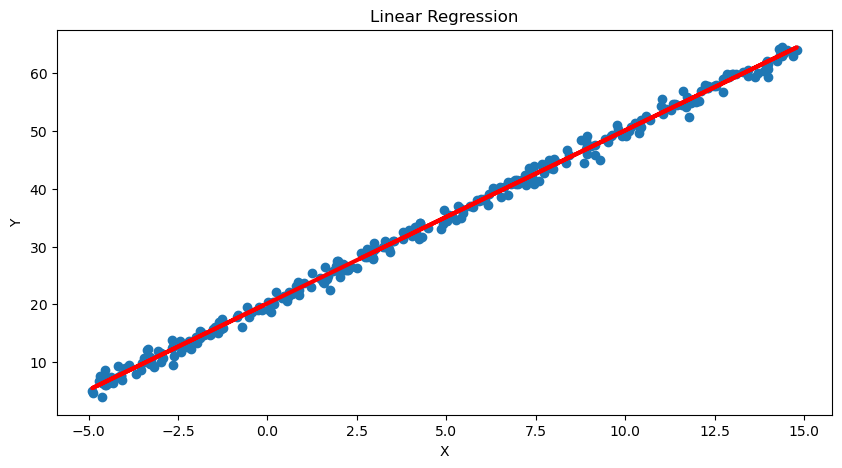

In [5]:
# Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Linear Regression
#   Note:   It is needed to give both the fit and predict methods 2D arrays. 
#           Right now x_train and x_test are currently only 1 dimensional.
#           What we shoudl do to fix it is: 
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)

# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(x_train, y_train);

# Make predictions using the testing set
y_pred = model.predict(x_test)

# The coefficients
print('True model: y ~ N(μ, σ^2)')
print('True μ =', beta_0, '+', beta_1, '* x')
print('Regression μ = %.2f' % model.intercept_, '+ %.2f' % model.coef_[0], '* x')

# The mean squared error
print('Mean squared error: %.4f' % mean_squared_error(y_train, model.predict(x_train)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(10,5));
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red', linewidth=3);
plt.title('Linear Regression');
plt.xlabel('X');
plt.ylabel('Y');

### **1.2.** Linear Regression with `statsmodels`

In [6]:
# Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Add (explicitly) the constant to the model
x_train = sm.add_constant(x_train)
x_test  = sm.add_constant(x_test)

# Fit and summarize OLS model
model = sm.OLS(y_train, x_train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.130e+05
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        21:25:36   Log-Likelihood:                -995.46
No. Observations:                 700   AIC:                             1995.
Df Residuals:                     698   BIC:                             2004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1637      0.050    407.004      0.0

Some statistical tests.

* **Overall F-test for significance**<br>
$\quad$ `p-value = Prob (F-statistic) = 0.00` <br>
The F-statistic test is used to test the significance of regression coefficients in linear regression models. If the p-value is less than a certain significance level (*e.g.* 0.05, 0.01), the sample data provide sufficient evidence to conclude that the regression model fits the data better than the model with no independent variables.

* **T-test for the intercept and the coefficients**<br>
$\quad$ **`Intercept`** $\;$ `p-value = P>|t| = 0.00`<br>
$\quad$ **`Coefficient`** $\;$ `p-value = P>|t| = 0.00`<br>
The t-test helps to determine the correlation between the response and the predictor variables. The test is used in linear regression to test the null hypothesis $H_0$ that the slope or the coefficient is equal to zero.

True model: y ~ N(μ, σ^2)
True μ = 20 + 3 * x
Regression μ = 20.16 + 2.99 * x
Mean squared error: 0.90
Coefficient of determination: 1.00


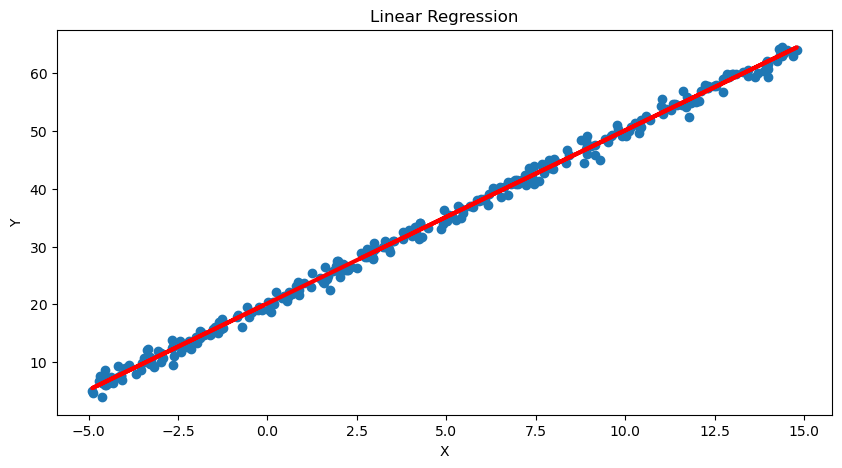

In [7]:
# Make predictions using the testing set
y_pred = model.predict(x_test)

# The coefficients
print('True model: y ~ N(μ, σ^2)')
print('True μ =', beta_0, '+', beta_1, '* x')
print('Regression μ = %.2f' % model.params[0], '+ %.2f' % model.params[1], '* x')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % model.rsquared)

# Plot outputs
plt.figure(figsize=(10,5));
plt.scatter(pd.DataFrame(x_test)[1], y_test)
plt.plot(pd.DataFrame(x_test)[1], y_pred, color='red', linewidth=3);
plt.title('Linear Regression');
plt.xlabel('X');
plt.ylabel('Y');

## **2.** Logistic regression

In the case of logistic regression $Y$ is a categorical value ($0$ or $1$) and it is modeled as:

$\qquad
\begin{cases}
        \;Y \sim Bernoulli(\mu)\\
        \;\log(\frac{\mu}{1-\mu}) = \beta_0 + \beta_1 \cdot X\\
        \;\mu = \frac{1}{1+e^{- (\beta_0 + \beta_1 \cdot X)}}
\end{cases}
$

In [8]:
np.random.seed(42)

# Parameters
n_sample = 750
beta_0   = -10.0
beta_1   = 3.5
liminf_x = 0
limsup_x = 12

# Data simulation
x = uniform(liminf_x, limsup_x, size=n_sample)

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

mu = logistic_function(beta_0 + beta_1*x)
y  = binomial(n=1, p=mu)

### **2.1.** Logistic Regression with `sklearn`

True model: y ~ Bernoulli(μ)
True logit(μ) = log(μ/(1-μ)) = -10.0 + 3.5 * x
Regression logit(μ) = log(μ/(1-μ)) = -7.27 + 2.61 * x
Accuracy:  0.9511111111111111
Precision:  0.9625
Recall:  0.9685534591194969
F1:  0.9655172413793103


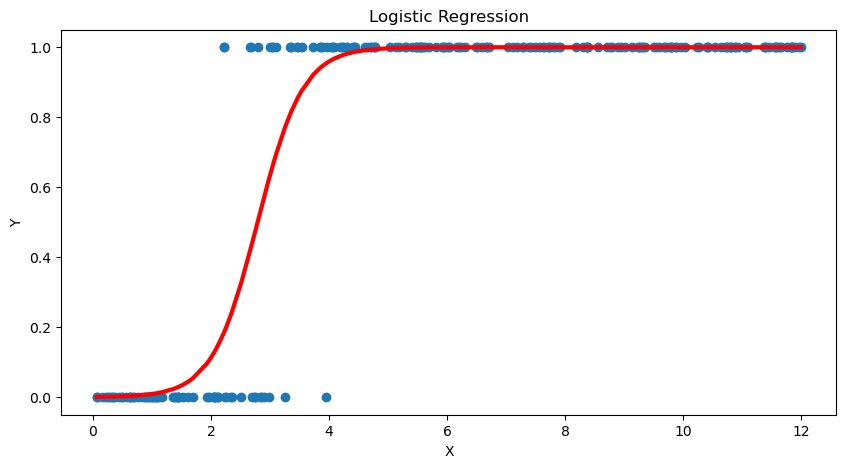

In [9]:
# Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Logistic Regression
#   Note:   It is needed to give both the fit and predict methods 2D arrays. 
#           Right now x_train and x_test are currently only 1 dimensional.
#           What we shoudl do to fix it is: 
x_train = x_train.reshape(-1, 1)

# Create linear regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train);

# Make predictions using the testing set
y_pred = model.predict(x_test.reshape(-1, 1))

# The coefficients
print('True model: y ~ Bernoulli(μ)')
print('True logit(μ) = log(μ/(1-μ)) =', beta_0, '+', beta_1, '* x')
print('Regression logit(μ) = log(μ/(1-μ)) = %.2f' % model.intercept_[0], '+ %.2f' % model.coef_[0][0], '* x')

# Metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

# Plot outputs
x_test_ord = x_test[x_test.argsort()]

plt.figure(figsize=(10,5));
plt.scatter(x_test, y_test);
plt.plot(x_test_ord, logistic_function(model.intercept_[0] + model.coef_[0][0]* x_test_ord), color='red', linewidth=3);
plt.title('Logistic Regression');
plt.xlabel('X');
plt.ylabel('Y');


Metrics:

* **Accuracy**: predicts the overall accuracy of the model $\big( = \frac{correct\;predictions}{predictions} \big)$

* **Precision**: percentage of *true* positive among all the *predicted* positive $\big( = \frac{true\;positive}{true\;positive \,+\, false\;positive} = \frac{true\;positive}{total\;predicted\;positive}\big)$

* **Recall**: percentage of the *predicted* positive among all the *true* positive $\big( = \frac{true\;positive}{true\;positive \,+\, false\;negative} = \frac{true\;positive}{total\;actual\;positive}\big)$

* **F1 Score**: *harmonic mean* between Precision and Recall values $\big( = 2\cdot\frac{precision\;\cdot\;recall}{precision \,+\, recall} \big)$<br>
*F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).*

### **2.2.** Logistic Regression with `statsmodels`

In [10]:
# Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# To have the intercept in the model
x_train = sm.add_constant(x_train)
x_test  = sm.add_constant(x_test)

# Logistic Regression
model = sm.Logit(y_train, x_train)
model = model.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.082670
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  525
Model:                          Logit   Df Residuals:                      523
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 May 2024   Pseudo R-squ.:                  0.8475
Time:                        21:28:07   Log-Likelihood:                -43.402
converged:                       True   LL-Null:                       -284.62
Covariance Type:            nonrobust   LLR p-value:                6.292e-107
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3138      1.203     -6.911      0.000     -10.672      -5.956
x1             2.9800      0

Some statistical tests.

* **LogLikelihood Ratio (LLR) test**<br>
$\quad$ `LLR p-value = 2.189e-65` <br>
This test has as $H_0$ the hypothesis that the model should be simplified, as $H_1$ the hypothesis that the model is good as it is. It is calculated as $-2\cdot\log\frac{likelihood(simple\;model)}{likelihood(fitted\;model)}$. If the p-value of this test is significantly small, then one can conclude that the predictor or set of predictors significantly improve the model's fit. This is analogous to the F-test used in linear regression analysis to assess the significance of prediction.

* **Z-test for the intercept and the coefficients**<br>
$\quad$ **`Intercept`** $\;$ `p-value = P>|t| = 0.00`<br>
$\quad$ **`Coefficient`** $\;$ `p-value = P>|t| = 0.00`<br>
The z-test helps to determine the correlation between the response and the predictor variables. The test is used in regression to test the null hypothesis $H_0$ that the slope or the coefficient is equal to zero.

True model: y ~ Bernoulli(μ)
True logit(μ) = log(μ/(1-μ)) = -10.0 + 3.5 * x
Regression logit(μ) = log(μ/(1-μ)) = -8.31 + 2.98 * x
Accuracy:  0.7066666666666667
Precision:  0.7066666666666667
Recall:  1.0
F1:  0.828125


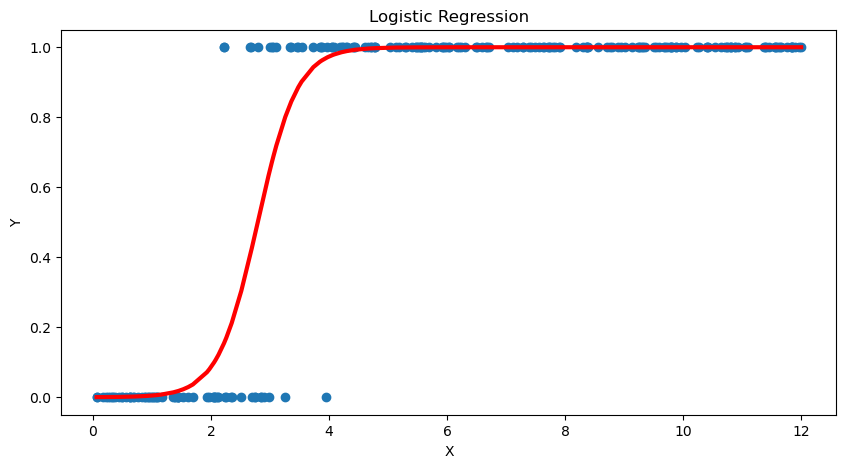

In [11]:
# Regression Line
y_pred = model.predict(x_test)

# The coefficients
print('True model: y ~ Bernoulli(μ)')
print('True logit(μ) = log(μ/(1-μ)) =', beta_0, '+', beta_1, '* x')
print('Regression logit(μ) = log(μ/(1-μ)) = %.2f' % model.params[0], '+ %.2f' % model.params[1], '* x')

# Metrics
print('Accuracy: ', accuracy_score(y_test, np.ceil(y_pred)))
print('Precision: ', precision_score(y_test, np.ceil(y_pred)))
print('Recall: ', recall_score(y_test, np.ceil(y_pred)))
print('F1: ', f1_score(y_test, np.ceil(y_pred)))

# Consider just the variable-column
x_test_single_col = pd.DataFrame(x_test)[1]

# Sort it (and y_pred)
idx = x_test_single_col.argsort()
x_test_ord, y_pred_ord = x_test_single_col[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x_test_single_col, y_test);
plt.plot(x_test_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Logistic Regression');
plt.xlabel('X');
plt.ylabel('Y');

## **3.** Poission regression

### **3.1.** Poisson distribution

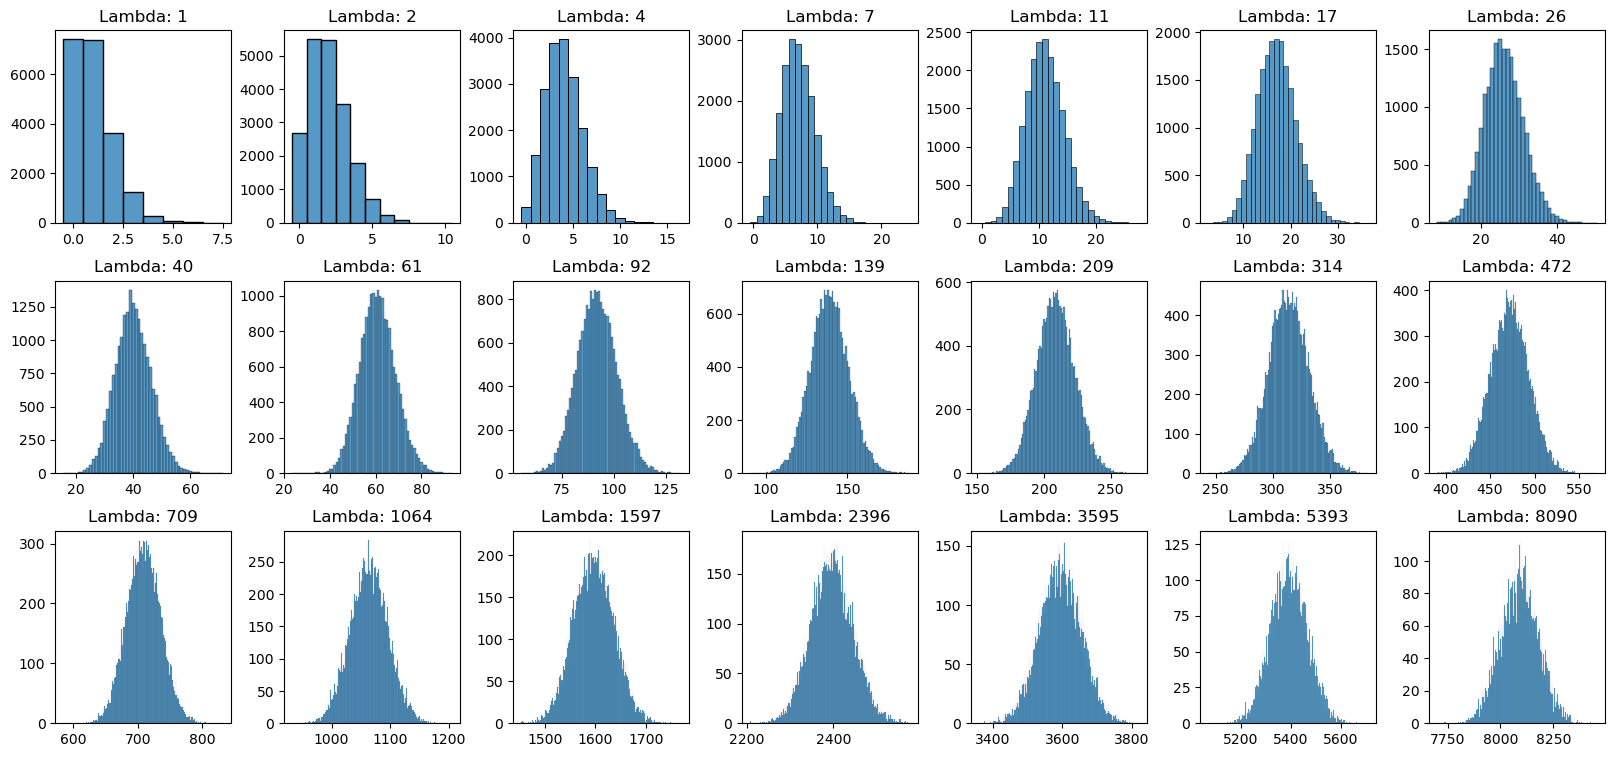

In [12]:
np.random.seed(42)

plt.figure(figsize=(20,9))

# Initial value of lambda
lambda_value = 0

# Number of rows and columns
n_rows = 3
n_cols = 7

for i in range(n_rows*n_cols):

    # Plot
    plt.subplot(n_rows, n_cols, i+1)
    
    # Increase lambda
    lambda_value = int(lambda_value + 1 + lambda_value*0.5)

    # Generate y_values
    y_values = np.random.poisson(lam=lambda_value, size=20000)
    sns.histplot(y_values, discrete=True)
    plt.title(f'Lambda: {lambda_value}')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(None)

plt.subplots_adjust(wspace=.3, hspace=.3)

### **3.2.** Poisson regression

In the case of poisson regression $Y$ is a positive integer (count) and it is modeled as:

$\qquad
\begin{cases}
        \;Y \sim Poisson(\mu)\\
        \;\log(\mu) = \beta_0 + \beta_1 \cdot X\\
        \;\mu = e^{\beta_0 + \beta_1 \cdot X}\\
\end{cases}
$

In [13]:
np.random.seed(42)

# Parameters
n_sample = 1500
beta_0   = -.9
beta_1   = .8
liminf_x = 1.5
limsup_x = 15

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = np.exp(beta_0 + beta_1*x)
y  = poisson(mu)

#### **3.2.1.** Poisson Regression with `sklearn`

True model: y ~ Poisson(μ)
True log(μ) = -0.9 + 0.8 * x
Regression log(μ) = -0.89 + 0.80 * x
Percentage of deviance explained (D^2): 0.9999


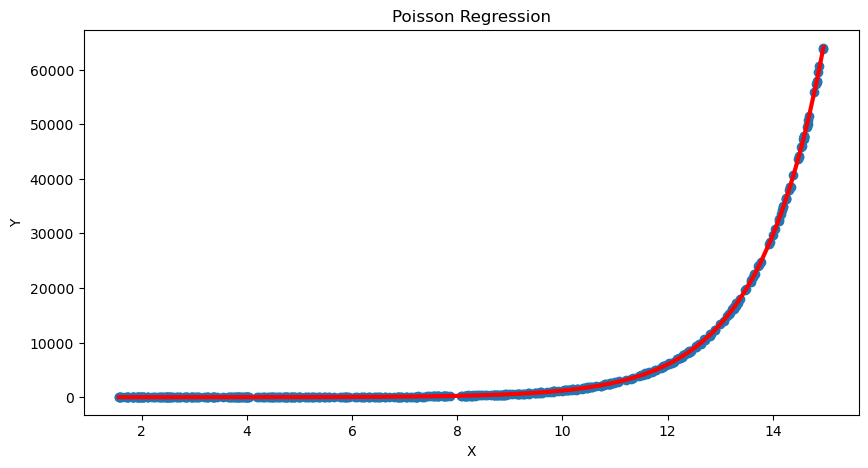

In [14]:
# Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Poisson Regression
#   Note:   It is needed to give both the fit and predict methods 2D arrays. 
#           Right now x_train and x_test are currently only 1 dimensional.
#           What we shoudl do to fix it is: 
x_train = x_train.reshape(-1, 1)

# Create linear regression object
model = PoissonRegressor()

# Train the model using the training sets
model.fit(x_train, y_train);

# Make predictions using the testing set
y_pred = model.predict(x_test.reshape(-1, 1))

# The coefficients
print('True model: y ~ Poisson(μ)')
print('True log(μ) =', beta_0, '+', beta_1, '* x')
print('Regression log(μ) = %.2f' % model.intercept_, '+ %.2f' % model.coef_[0], '* x')

# Percentage of deviance explained (D^2)
print('Percentage of deviance explained (D^2): %.4f' % model.score(x_test.reshape(-1, 1), y_test))

# Plot outputs
plt.figure(figsize=(10,5));
plt.scatter(x_test, y_test)
plt.plot(x_test[x_test.argsort()], y_pred[x_test.argsort()], color='red', linewidth=3);
plt.title('Poisson Regression');
plt.xlabel('X');
plt.ylabel('Y');

The percentage of deviance explained, $D^2$, is a generalization of the coefficient of determination $R^2$ (from linear regression). 

The percentage of deviance explained is calculated as $D^2 = 1-\frac{D(y_{true}, y_{pred})}{D_{null}}$, where $D(\cdot,\cdot)$ is the deviance function calculated (in the Poisson case) as $D(y_{true}, y_{pred}) = \frac{1}{N}\,\sum_{i=1}^N 2\,(y_{true_i}\log(\frac{y_{true_i}}{y_{pred_i}}) + y_{pred} - y_{trye})$, and $D_{null} = D(y_{true}, \bar{y})$ (where $\bar{y}$ is the mean of the samples). 

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

#### **3.2.2.** Poisson Regression with `statsmodels`

In [15]:
# Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# To have the intercept in the model
x_train = sm.add_constant(x_train)

# Poisson Regression
model = statsmodels.discrete.discrete_model.Poisson(y_train, x_train)
model = model.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 4.283004
         Iterations 9
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                 1050
Model:                        Poisson   Df Residuals:                     1048
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 May 2024   Pseudo R-squ.:                  0.9995
Time:                        21:28:53   Log-Likelihood:                -4497.2
converged:                       True   LL-Null:                   -8.9142e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8912      0.004   -204.988      0.000      -0.900      -0.883
x1             0.7994      0.

Some statistical tests.

* **LogLikelihood Ratio (LLR) test**<br>
$\quad$ `LLR p-value = 0.000` <br>
This test has as $H_0$ the hypothesis that the model should be simplified, as $H_1$ the hypothesis that the model is good as it is. If the p-value of this test is significantly small, then one can conclude that the predictor or set of predictors significantly improve the model's fit. This is analogous to the F-test used in linear regression analysis to assess the significance of prediction.

* **Z-test for the intercept and the coefficients**<br>
$\quad$ **`Intercept`** $\;$ `p-value = P>|t| = 0.00`<br>
$\quad$ **`Coefficient`** $\;$ `p-value = P>|t| = 0.00`<br>
The z-test helps to determine the correlation between the response and the predictor variables. The test is used in regression to test the null hypothesis $H_0$ that the slope or the coefficient is equal to zero.

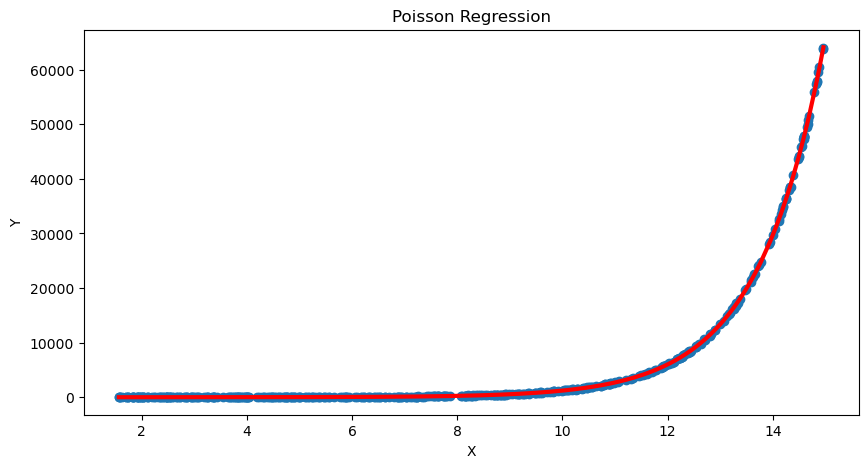

In [16]:
# Regression Line
y_pred = model.predict(sm.add_constant(x_test))

idx = x_test.argsort()
x_test_ord, y_pred_ord = x_test[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x_test, y_test);
plt.plot(x_test_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Poisson Regression');
plt.xlabel('X');
plt.ylabel('Y');

## **4.** Custom regression with `statsmodels`

### **4.1.** Predicting with OLS

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     899.7
Date:                Wed, 01 May 2024   Prob (F-statistic):          1.59e-163
Time:                        21:29:14   Log-Likelihood:                -31804.
No. Observations:                2000   AIC:                         6.361e+04
Df Residuals:                    1998   BIC:                         6.362e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.899e+06   1.02e+05    -18.649      0.0

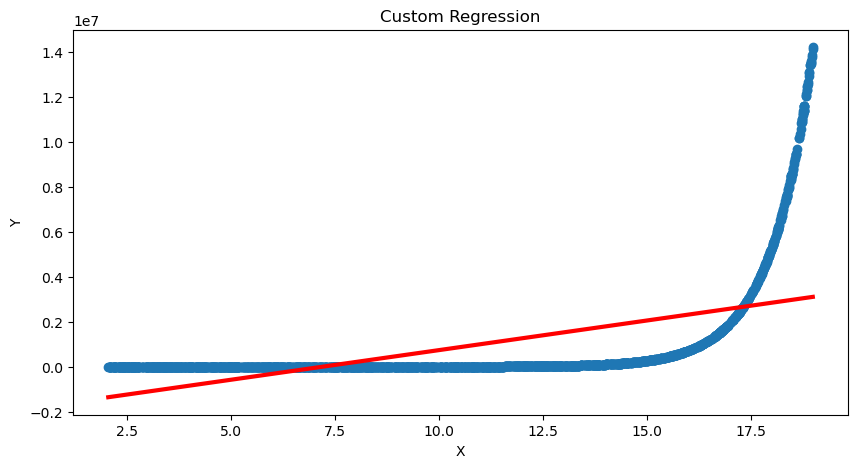

In [17]:
np.random.seed(42)

# Parameters
n_sample = 2000
beta_0   = 2.5
beta_1   = 15
beta_2   = .08
std_dev  = 0.4
liminf_x = 2
limsup_x = 19

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = beta_0 + beta_1*np.sin(x) + beta_2*np.exp(x)
y  = normal(mu, std_dev)

# To have the intercept in the model
x_with_intercept = sm.add_constant(x)

# Regression
model = sm.OLS(y, x_with_intercept)
model = model.fit()
print(model.summary())

# Regression Line
y_pred = model.predict(x_with_intercept)
idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x, y);
plt.plot(x_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Custom Regression');
plt.xlabel('X');
plt.ylabel('Y');

### **4.2.** Predicting with GLM (Gaussian family)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      498
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                          69.376
Method:                          IRLS   Log-Likelihood:                -1768.4
Date:                Tue, 30 Apr 2024   Deviance:                       34549.
Time:                        19:47:25   Pearson chi2:                 3.45e+04
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9526      0.062    -47.637      0.0

/Users/stuti_up_02/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


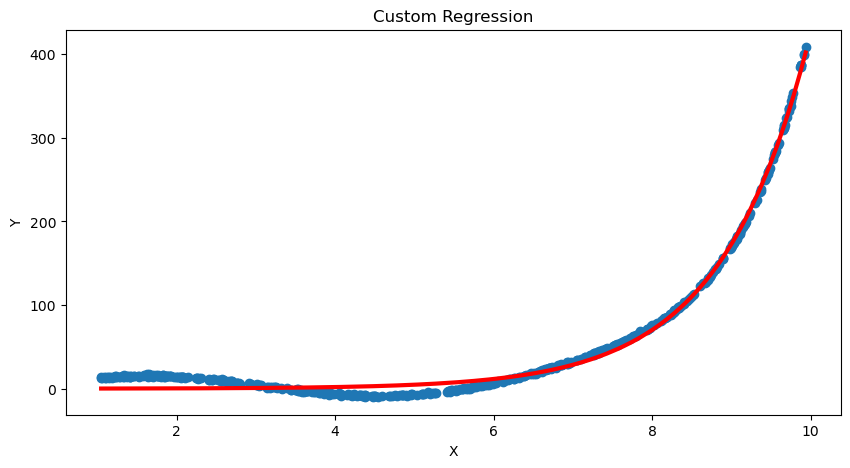

In [18]:
np.random.seed(42)

# Parameters
n_sample = 500
beta_0   = 2.3
beta_1   = 13
beta_2   = .02
std_dev  = 0.7
liminf_x = 1
limsup_x = 10

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = beta_0 + beta_1*np.sin(x) + beta_2*np.exp(x)
y  = normal(mu, std_dev)

# To have the intercept in the model
x_with_intercept = sm.add_constant(x)

# Regression
model = sm.GLM(y, x_with_intercept, family=sm.families.Gaussian(sm.families.links.log()))
model = model.fit()
print(model.summary())

# Regression Line
y_pred = model.predict(x_with_intercept)
idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x, y);
plt.plot(x_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Custom Regression');
plt.xlabel('X');
plt.ylabel('Y');

### **4.3.** Predicting with **wrong** formula

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     232.5
Date:                Wed, 01 May 2024   Prob (F-statistic):           5.38e-72
Time:                        21:29:39   Log-Likelihood:                -2792.4
No. Observations:                 500   AIC:                             5591.
Df Residuals:                     497   BIC:                             5603.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -97.8595      8.354    -11.714      0.0

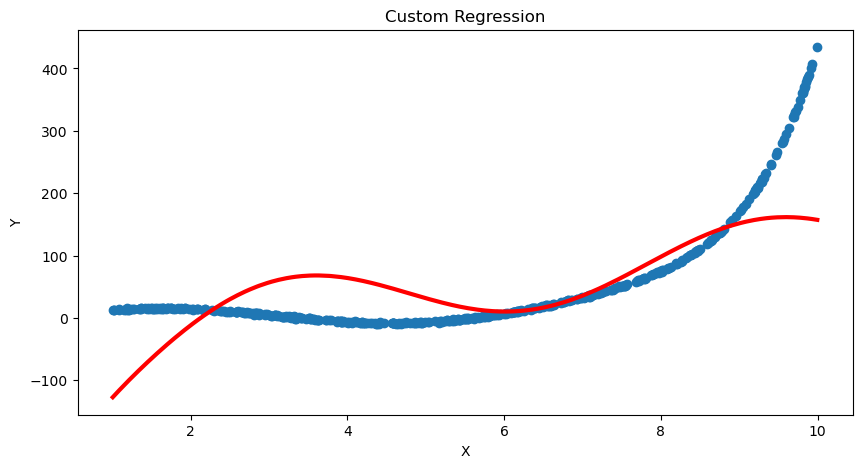

In [18]:
np.random.seed(55)

# Parameters
n_sample = 500
beta_0   = 2.3
beta_1   = 13
beta_2   = .02
std_dev  = 0.7
liminf_x = 1
limsup_x = 10

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = beta_0 + beta_1*np.sin(x) + beta_2*np.exp(x)
y  = normal(mu, std_dev)

data = pd.DataFrame(x, columns=['x'])
data['y'] = y

# Regression
model = smf.ols(formula='y ~ 1 + np.cos(x) + np.log(x)', data=data)
model = model.fit()
print(model.summary())

# Regression Line
y_pred = model.predict(data[['x']])
idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x, y);
plt.plot(x_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Custom Regression');
plt.xlabel('X');
plt.ylabel('Y');

### **4.4.** Predicting with **right** formula

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.386e+06
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        21:29:41   Log-Likelihood:                -534.08
No. Observations:                 500   AIC:                             1074.
Df Residuals:                     497   BIC:                             1087.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3117      0.037     61.915      0.0

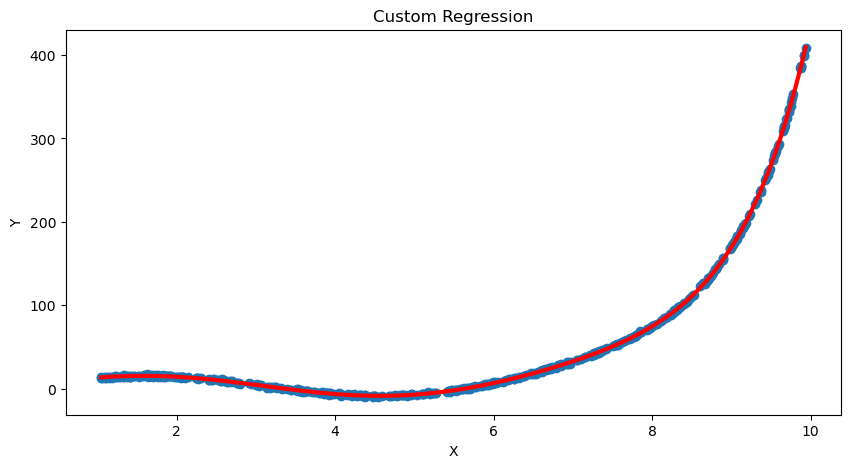

In [19]:
np.random.seed(42)

# Parameters
n_sample = 500
beta_0   = 2.3
beta_1   = 13
beta_2   = .02
std_dev  = 0.7
liminf_x = 1
limsup_x = 10

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = beta_0 + beta_1*np.sin(x) + beta_2*np.exp(x)
y  = normal(mu, std_dev)

data = pd.DataFrame(x, columns=['x'])
data['y'] = y

# Regression
model = smf.ols(formula='y ~ 1 + np.sin(x) + np.exp(x)', data=data)
model = model.fit()
print(model.summary())

# Regression Line
y_pred = model.predict(data[['x']])
idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x, y);
plt.plot(x_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Custom Regression');
plt.xlabel('X');
plt.ylabel('Y');